In [1]:
3+6

9

In [9]:
%%bq query 
# sql query to return total birhts by year
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


In [5]:
%%bq query --name total_births
# sql query to return total birhts by year
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

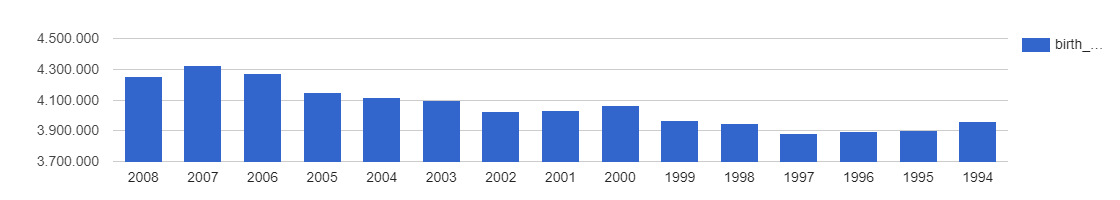

In [8]:
% chart columns --data total_births --fields year,birth_count

In [12]:

query = """
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC

"""

In [13]:
# call bigquery and examine in dataframe
import google.datalab.bigquery as bq
df=bq.Query(query+"LIMIT 15").execute().result().to_dataframe()
df.head()

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


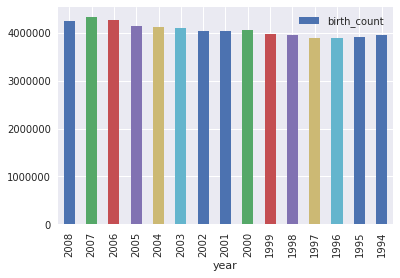

In [15]:
# BAR PLOT 

df.plot(x='year',y='birth_count',kind='bar');

In [18]:
print(df)

    year  birth_count
0   2008      4255156
1   2007      4324008
2   2006      4273225
3   2005      4145619
4   2004      4118907
5   2003      4096092
6   2002      4027376
7   2001      4031531
8   2000      4063823
9   1999      3963465
10  1998      3945192
11  1997      3884329
12  1996      3894874
13  1995      3903012
14  1994      3956925


In [26]:

print(df['year'])

0     2008
1     2007
2     2006
3     2005
4     2004
5     2003
6     2002
7     2001
8     2000
9     1999
10    1998
11    1997
12    1996
13    1995
14    1994
Name: year, dtype: object


In [28]:
 print(df.loc[0])

year              2008
birth_count    4255156
Name: 0, dtype: object


In [30]:
print(df.groupby('year').sum())

      birth_count
year             
1994      3956925
1995      3903012
1996      3894874
1997      3884329
1998      3945192
1999      3963465
2000      4063823
2001      4031531
2002      4027376
2003      4096092
2004      4118907
2005      4145619
2006      4273225
2007      4324008
2008      4255156


In [20]:
print(df.describe())

        birth_count
count  1.500000e+01
mean   4.058902e+06
std    1.422076e+05
min    3.884329e+06
25%    3.951058e+06
50%    4.031531e+06
75%    4.132263e+06
max    4.324008e+06
